# Entrenament #

Dividir el conjunt de dades, codificar variables categòriques, estandarditzar les característiques i reduir la dimensionalitat del conjunt de dades. Recorda quin conjunt de dades has d'utilitzar a cada moment.

In [13]:
cd C:/Users/thais/Documents/00_MACHINE_LEARNING/


C:\Users\thais\Documents\00_MACHINE_LEARNING


In [14]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sys  # Añade esta línea para importar sys
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import warnings

# Suprimir todas las advertencias
warnings.filterwarnings('ignore')

from scipy import stats

In [15]:
banc_transformed= pd.read_csv ('banc_transformed.csv') # carreguem el dataset

In [16]:
banc_def = banc_transformed.copy()

In [17]:
# Convertir la variable 'deposit' a formato numérico
banc_def['deposit'] = banc_transformed['deposit'].map({'no': 0, 'yes': 1})

In [18]:
banc_def.describe()

,deposit,age,balance,duration,campaign,pdays,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.473840,0.131481,0.616985,0.326798,0.254211,2.509694,0.015051,0.473123,0.130801,0.254256
std,0.499338,0.700565,2.033678,0.969632,1.361039,5.224082,0.121761,0.499299,0.337198,0.435461
min,0.000000,-1.235294,-4.663934,-0.706704,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.411765,-0.269861,-0.326816,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.588235,0.730139,0.673184,0.500000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.294118,50.853720,10.128492,30.500000,41.156627,1.000000,1.000000,1.000000,1.000000


In [19]:
# Llistat de columnes que vols eliminar
columnes_a_eliminar = [
    'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
    'job_management', 'job_retired', 'job_self-employed', 'job_services',
    'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
    'marital_divorced', 'marital_married', 'marital_single',
    'education_primary', 'education_secondary', 'education_tertiary', 
    'education_unknown',
    
    # Eliminar les columnes dels mesos
    'month_apr', 'month_aug', 'month_dec', 'month_feb', 
    'month_jan', 'month_jul', 'month_jun', 'month_mar', 
    'month_may', 'month_nov', 'month_oct', 'month_sep',
    # Els dies del mes
    'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 
    'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 
    'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 
    'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 
    'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 
    'day_31',
     # Eliminar campaign
    'campaign'
]

# Eliminar les columnes no desitjades
banc_def = banc_def.drop(columns=columnes_a_eliminar)

# Mostrar les columnes restants
print("Columnes restants després d'eliminar les no desitjades:")
print(banc_def.columns.tolist())


Columnes restants després d'eliminar les no desitjades:
['deposit', 'age', 'balance', 'duration', 'pdays', 'default_numeric', 'housing_numeric', 'loan_numeric', 'contact_previ_numeric']


In [20]:
banc_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   deposit                11162 non-null  int64  
 1   age                    11162 non-null  float64
 2   balance                11162 non-null  float64
 3   duration               11162 non-null  float64
 4   pdays                  11162 non-null  float64
 5   default_numeric        11162 non-null  int64  
 6   housing_numeric        11162 non-null  int64  
 7   loan_numeric           11162 non-null  int64  
 8   contact_previ_numeric  11162 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 785.0 KB


Best params for logistic: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best params for decision_tree: {'classifier__max_depth': 10}
Best params for random_forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best params for gradient_boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Best params for xgboost: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
--- logistic ---
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1762
           1       0.79      0.73      0.76      1587

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusion Matrix:
 [[1456  306]
 [ 430 1157]]




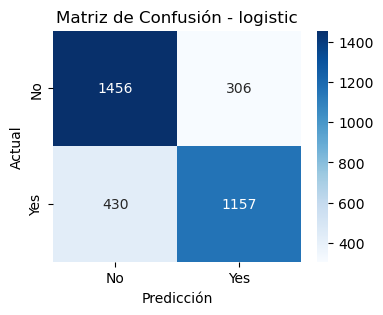

--- decision_tree ---
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1762
           1       0.77      0.77      0.77      1587

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusion Matrix:
 [[1399  363]
 [ 368 1219]]




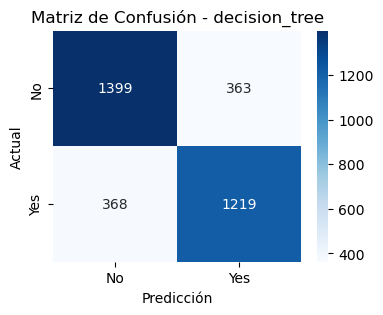

--- random_forest ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1762
           1       0.79      0.81      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1419  343]
 [ 295 1292]]




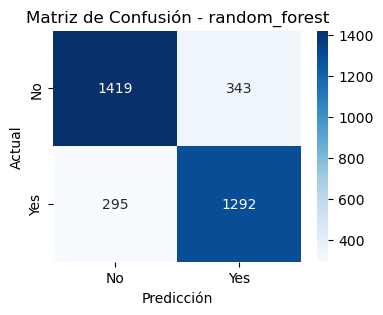

--- gradient_boosting ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1762
           1       0.79      0.80      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1433  329]
 [ 316 1271]]




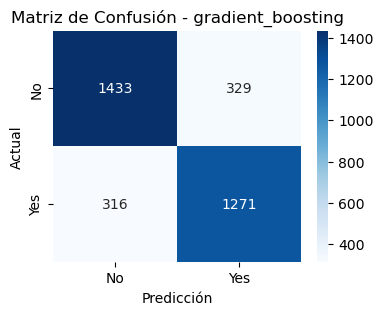

--- xgboost ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1762
           1       0.79      0.82      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1408  354]
 [ 291 1296]]




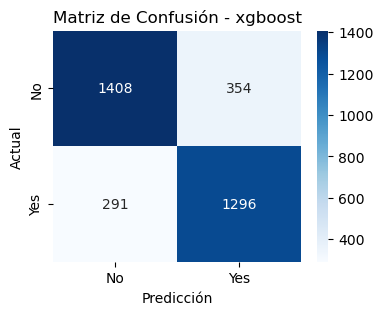

Modelo de Random Forest guardado exitosamente.


In [22]:
# Separar las variables independientes (features) y la variable dependiente (target)
target = 'deposit'
X = banc_def.drop(columns=[target])  # Features
y = banc_def[target]  # Target

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear y ajustar el escalador con los datos de entrenamiento
scaler = RobustScaler()
scaler.fit(X_train)  # Reemplaza X_train con tu conjunto de datos de entrenamiento

# Guardar el escalador ajustado
with open('robust_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Definir modelos y pipelines
models = {
    'logistic': LogisticRegression(random_state=42, max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
    'xgboost': XGBClassifier(eval_metric='logloss')
}

# Crear pipelines que incluyan el escalador
pipelines = {name: Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', model)
]) for name, model in models.items()}

# Parámetros de Grid Search ajustados
param_grids = {
    'logistic': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'decision_tree': {
        'classifier__max_depth': [10, 20]
    },
    'random_forest': {
        'classifier__n_estimators': [100],
        'classifier__max_depth': [10, 20]
    },
    'gradient_boosting': {
        'classifier__n_estimators': [100],
        'classifier__learning_rate': [0.01, 0.1]
    },
    'xgboost': {
        'classifier__n_estimators': [100],
        'classifier__learning_rate': [0.01, 0.1]
    }
}

# Grid Search y mejor modelo
best_estimators = {}
for name, pipeline in pipelines.items():
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_estimators[name] = grid_search.best_estimator_
        print(f'Best params for {name}: {grid_search.best_params_}')
    else:
        pipeline.fit(X_train, y_train)
        best_estimators[name] = pipeline

# Evaluación y visualización
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'--- {name} ---')
    print(f'Accuracy: {score:.2f}')
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

    # Visualización condicional de la matriz de confusión
    if hasattr(sys, 'ps1'):
        plt.figure(figsize=(4, 3))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.ylabel('Actual')
        plt.xlabel('Predicción')
        plt.title(f'Matriz de Confusión - {name}')
        plt.show()

# Guardar el mejor modelo de Random Forest
best_random_forest_model = best_estimators['random_forest']
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_random_forest_model, model_file)
print("Modelo de Random Forest guardado exitosamente.")

## Visualización de Curvas con el Modelo Entrenado ##

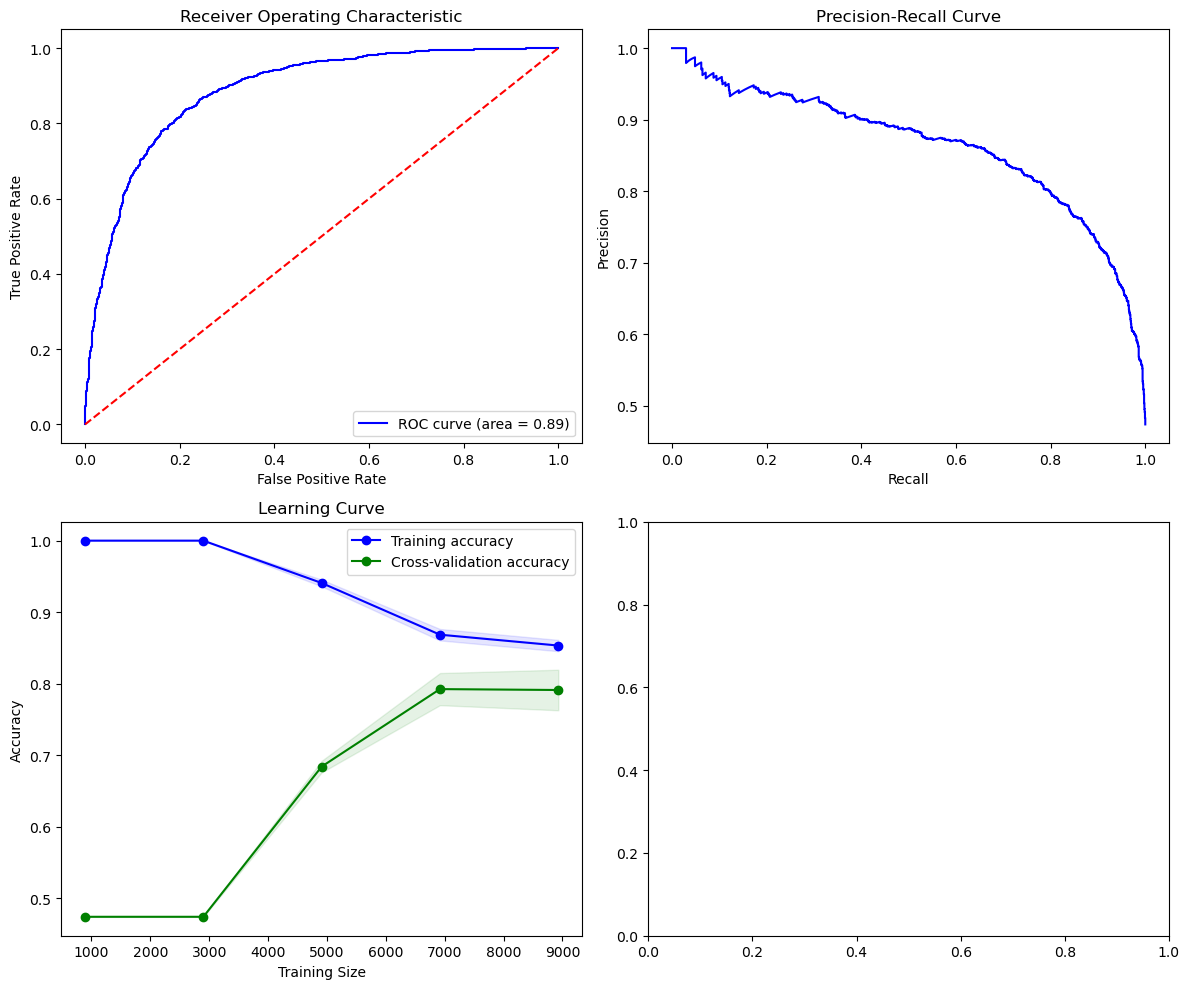

In [23]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

# Obtener el mejor modelo
rf_model = best_estimators['random_forest']

# Predecir probabilidades en el conjunto de prueba
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear la figura con subtramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Curva ROC
axs[0, 0].plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic')
axs[0, 0].legend(loc='lower right')

# Curva de Precisión-Recall
axs[0, 1].plot(recall, precision, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# Curvas de Aprendizaje
axs[1, 0].plot(train_sizes, train_mean, color='blue', marker='o', label='Training accuracy')
axs[1, 0].plot(train_sizes, test_mean, color='green', marker='o', label='Cross-validation accuracy')
axs[1, 0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
axs[1, 0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
axs[1, 0].set_title('Learning Curve')
axs[1, 0].set_xlabel('Training Size')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


--- random_forest ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1762
           1       0.79      0.81      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1419  343]
 [ 295 1292]]



## Conclusions Finals ##

En les etapes anteriors, ja vaig entrenar els models i definit el que utilitzaré pel meu projecte bancari.
També vaig interpretar els resultats finals. Així que només detallaré les conclusions finals sobre el model escollit i l'estratègia de marketing per obtenir més dipòsits.

Conclusions per EL MODEL DE PREDICCIÓ:

Hem arribat a crear un bon model predictiu, que prediu amb molta precisió els clients que tenen possibilitats de subscriure un dipòsit bancari.
Una bona campanya de màrketing aconseguint que el client escolti i s'allargui la durada de la trucada és la base de l'èxit.
També el fet de contactar-lo recentment.

Conclusions per als Objectius del Negoci:

Aquestes correlacions poden ser molt útils per dissenyar les estratègies de màrqueting:

Focalització en trucades més llargues:
Com que la durada té una forta correlació amb la contractació, el banc pot valorar les interaccions de qualitat amb els clients, fomentant converses més detallades per ajudar a convèncer els clients.
Optimització de Seguiments:
Donat que els contactes previs mostren una correlació positiva, una estratègia de seguiment eficient (ni massa freqüent ni massa esporàdica) pot ser efectiva.
Segmentació de clients amb menys compromisos financers:
Pot ser més rendible dirigir la campanya cap a clients sense hipoteques o altres préstecs, ja que aquests tendeixen a tenir una probabilitat més alta de contractar un dipòsit.